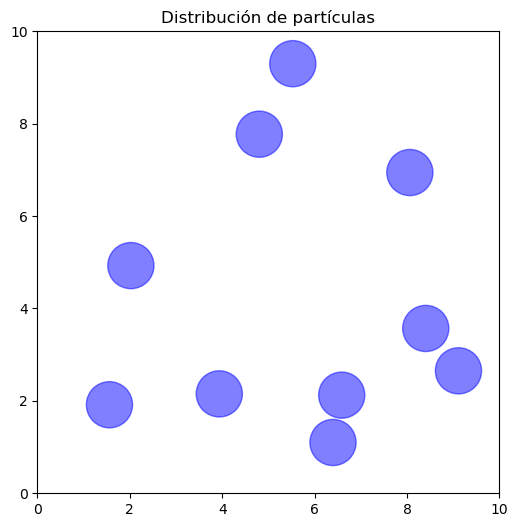

In [7]:
import random
import matplotlib.pyplot as plt

def generar_particulas(n, espacio, radio):
    """
    Genera partículas en un espacio definido con un radio específico.
    
    Parámetros:
    - n: Número de partículas.
    - espacio: Dimensiones del espacio (ancho, alto).
    - radio: Radio de cada partícula.
    
    Retorna:
    - Lista de partículas con sus posiciones.
    """
    ancho, alto = espacio
    particulas = []

    for _ in range(n):
        while True:
            # Generar coordenadas aleatorias respetando los límites del espacio
            x = random.uniform(radio, ancho - radio)
            y = random.uniform(radio, alto - radio)

            # Verificar si la nueva partícula no se solapa con otras
            solapamiento = any(
                (x - px) ** 2 + (y - py) ** 2 < (2 * radio) ** 2
                for px, py in particulas
            )
            if not solapamiento:
                particulas.append((x, y))
                break
    
    return particulas

def mostrar_particulas(particulas, espacio, radio):
    """
    Muestra las partículas en un gráfico.
    
    Parámetros:
    - particulas: Lista de posiciones de las partículas.
    - espacio: Dimensiones del espacio (ancho, alto).
    - radio: Radio de cada partícula.
    """
    ancho, alto = espacio
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, ancho)
    ax.set_ylim(0, alto)
    ax.set_aspect('equal', adjustable='box')

    # Dibujar partículas
    for x, y in particulas:
        circulo = plt.Circle((x, y), radio, color='blue', alpha=0.5)
        ax.add_artist(circulo)

    plt.title("Distribución de partículas")
    plt.show()

# Parámetros
n = 10          # Número de partículas
espacio = (10, 10)  # Dimensiones del espacio (ancho, alto)
radio = 0.5     # Radio de las partículas

# Generar y mostrar partículas
particulas = generar_particulas(n, espacio, radio)
mostrar_particulas(particulas, espacio, radio)


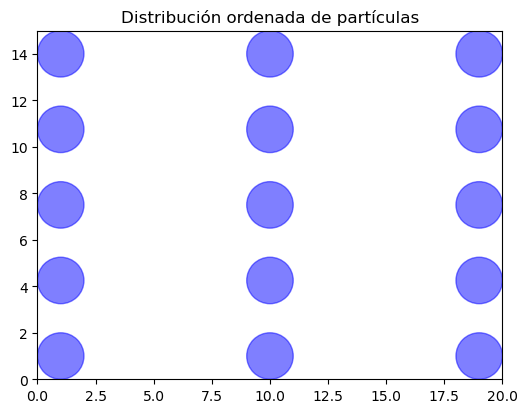

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def generar_particulas_ordenadas(n, espacio, radio):
    """
    Genera partículas ordenadas en una cuadrícula dentro del espacio definido.

    Parámetros:
    - n: Número de partículas.
    - espacio: Dimensiones del espacio (ancho, alto).
    - radio: Radio de cada partícula.

    Retorna:
    - Lista de posiciones (x, y) de las partículas.
    """
    ancho, alto = espacio

    # Estimación del número de partículas por fila y columna
    cols = int(np.sqrt(n))  # Número de columnas
    rows = (n // cols) + (1 if n % cols != 0 else 0)  # Número de filas

    # Espaciado entre partículas (basado en el radio)
    espaciado_x = (ancho - 2 * radio) / (cols - 1) if cols > 1 else ancho / 2
    espaciado_y = (alto - 2 * radio) / (rows - 1) if rows > 1 else alto / 2

    particulas = []
    
    # Generar las partículas en una cuadrícula
    for i in range(rows):
        for j in range(cols):
            x = radio + j * espaciado_x
            y = alto - (radio + i * espaciado_y)  # Se ordenan desde arriba hacia abajo
            particulas.append((x, y))

            # Si ya alcanzamos el número de partículas, salimos
            if len(particulas) >= n:
                return particulas

    return particulas

def mostrar_particulas(particulas, espacio, radio):
    """
    Muestra las partículas en un gráfico.

    Parámetros:
    - particulas: Lista de posiciones de las partículas.
    - espacio: Dimensiones del espacio (ancho, alto).
    - radio: Radio de cada partícula.
    """
    ancho, alto = espacio
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, ancho)
    ax.set_ylim(0, alto)
    ax.set_aspect('equal', adjustable='box')

    # Dibujar partículas
    for x, y in particulas:
        circulo = plt.Circle((x, y), radio, color='blue', alpha=0.5)
        ax.add_artist(circulo)

    plt.title("Distribución ordenada de partículas")
    plt.show()

# Parámetros
n = 15          # Número de partículas
espacio = (20, 15)  # Dimensiones del espacio (ancho, alto)
radio = 1     # Radio de las partículas

# Generar y mostrar partículas ordenadas
particulas = generar_particulas_ordenadas(n, espacio, radio)
mostrar_particulas(particulas, espacio, radio)
